In [1]:
from time import time

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from tools.common_methods import get_train_test_data

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [3]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
best_gbr = joblib.load('../saved_models/gradient_boosting_regressor.sav')

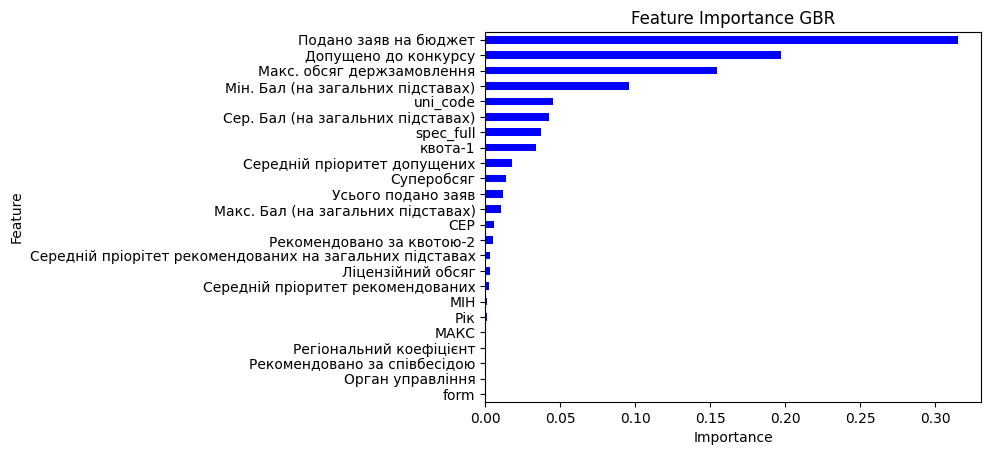

In [5]:
importances = pd.Series(best_gbr.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance GBR")
plt.show()

In [7]:
results_df = pd.DataFrame(columns=['Amount of features', 'MSE', 'R2 Score'])

for n in range(5, 15):
    start = time()
    n_best_features = importances.sort_values(ascending=False).head(n).keys()
    x_train_n_features = X_train.get(n_best_features)
    x_train_n_features_std = sc.fit_transform(x_train_n_features)

    x_test_n_features = X_test.get(n_best_features)
    x_test_n_features_std = sc.transform(x_test_n_features)

    gbr_params = {'max_depth': [4, 5, 6, 7],
                  'random_state': [1],
                  'n_estimators': [5000],
                  'learning_rate': [0.01, 0.05, 0.1, 0.15]
                  }

    gbr_grid = GridSearchCV(GradientBoostingRegressor(), gbr_params, cv=5, n_jobs=-1, scoring='r2')
    gbr_grid.fit(x_train_n_features_std, y_train)

    y_pred_gbr = gbr_grid.best_estimator_.predict(x_test_n_features_std)

    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)
    results_df = results_df.append({'Amount of features': n, 'MSE': mse_gbr, 'R2 Score': r2_gbr}, ignore_index=True)

    print(n, '- time for the round:', time() - start)
    print(gbr_grid.best_params_)
    print(mse_gbr, r2_gbr)
    print()

5 - time for the round: 1607.3450257778168
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 5000, 'random_state': 1}
62.0262248329644 0.9600264907281226

6 - time for the round: 2249.402960538864
{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 5000, 'random_state': 1}
54.56642449914019 0.9648340442849207

7 - time for the round: 2668.3350689411163
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 5000, 'random_state': 1}
48.219056380638186 0.9689246781905024

8 - time for the round: 2410.109879255295
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5000, 'random_state': 1}
50.560313990339985 0.9674158279739803

9 - time for the round: 2759.125012397766
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
49.88282925937548 0.9678524407494264

10 - time for the round: 3015.848037958145
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
46.00235640186415 0.9703532558186447

11 - time for the round: 3308.882

KeyboardInterrupt: 

5 - time for the round: 1607.3450257778168
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 5000, 'random_state': 1}
62.0262248329644 0.9600264907281226

6 - time for the round: 2249.402960538864
{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 5000, 'random_state': 1}
54.56642449914019 0.9648340442849207

7 - time for the round: 2668.3350689411163
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 5000, 'random_state': 1}
48.219056380638186 0.9689246781905024

8 - time for the round: 2410.109879255295
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5000, 'random_state': 1}
50.560313990339985 0.9674158279739803

9 - time for the round: 2759.125012397766
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
49.88282925937548 0.9678524407494264

10 - time for the round: 3015.848037958145
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
46.00235640186415 0.9703532558186447

11 - time for the round: 3308.882964849472
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
45.45030656787267 0.9707090306415849

12 - time for the round: 3772.156242132187
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
43.75696781943869 0.9718003221451906

13 - time for the round: 4109.637789726257
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 1}
43.11527149657824 0.972213870672135


In [12]:
n_best_features = importances.sort_values(ascending=False).head(12).keys()
x_train_n_features = X_train.get(n_best_features)
x_train_n_features_std = sc.fit_transform(x_train_n_features)

x_test_n_features = X_test.get(n_best_features)
x_test_n_features_std = sc.transform(x_test_n_features)

best_depth = 0
best_rate = 0

best_mse = 100

for rate in [0.01, 0.05, 0.1, 0.15]:
    for depth in [4, 5, 6]:
        start = time()
        gbr_params = {'learning_rate': rate,
                      'max_depth': depth,
                      'n_estimators': 5000,
                      'random_state': 1}

        gbr = GradientBoostingRegressor(**gbr_params)

        gbr.fit(x_train_n_features_std, y_train)
        y_pred_gbr = gbr.predict(x_test_n_features_std)
        mse_gbr = mean_squared_error(y_test, y_pred_gbr)

        if mse_gbr < best_mse:
            best_mse = mse_gbr
            best_depth = depth
            best_rate = rate
        print('time for the round:', time() - start, 'best mse:', best_mse)

time for the round: 175.43810033798218 best mse: 50.42662584051065
time for the round: 179.4349775314331 best mse: 41.77455838522687
time for the round: 204.08771395683289 best mse: 39.69043034835035
time for the round: 138.21492791175842 best mse: 39.69043034835035
time for the round: 171.8143129348755 best mse: 39.14776780190558
time for the round: 204.93004488945007 best mse: 38.937964765402775
time for the round: 138.26693153381348 best mse: 38.937964765402775
time for the round: 171.6710708141327 best mse: 38.937964765402775
time for the round: 205.30738592147827 best mse: 38.937964765402775
time for the round: 139.53820848464966 best mse: 38.937964765402775
time for the round: 173.67234230041504 best mse: 38.937964765402775
time for the round: 207.29688215255737 best mse: 38.937964765402775


In [13]:
print(best_rate, best_depth)

0.05 6


In [14]:
n_best_features = importances.sort_values(ascending=False).head(7).keys()
x_train_n_features = X_train.get(n_best_features)
x_train_n_features_std = sc.fit_transform(x_train_n_features)

x_test_n_features = X_test.get(n_best_features)
x_test_n_features_std = sc.transform(x_test_n_features)

best_depth = 0
best_rate = 0

best_mse = 100

for rate in [0.01, 0.05, 0.1, 0.15]:
    for depth in [4, 5, 6]:
        start = time()
        gbr_params = {'learning_rate': rate,
                      'max_depth': depth,
                      'n_estimators': 1000,
                      'random_state': 1}

        gbr = GradientBoostingRegressor(**gbr_params)

        gbr.fit(x_train_n_features_std, y_train)
        y_pred_gbr = gbr.predict(x_test_n_features_std)
        mse_gbr = mean_squared_error(y_test, y_pred_gbr)

        if mse_gbr < best_mse:
            best_mse = mse_gbr
            best_depth = depth
            best_rate = rate
        print('time for the round:', time() - start, 'best mse:', best_mse)

time for the round: 17.295902013778687 best mse: 88.16001974767507
time for the round: 20.766671180725098 best mse: 68.35822757720123
time for the round: 24.85275149345398 best mse: 58.87453070916981
time for the round: 16.810558080673218 best mse: 58.87453070916981
time for the round: 20.73870086669922 best mse: 52.50683345945078
time for the round: 24.83660626411438 best mse: 49.3555370824182
time for the round: 17.06985330581665 best mse: 49.3555370824182
time for the round: 21.401239156723022 best mse: 48.46301761079571
time for the round: 25.65252447128296 best mse: 47.84095698571376
time for the round: 17.28569269180298 best mse: 47.84095698571376
time for the round: 21.601500988006592 best mse: 47.84095698571376
time for the round: 24.875184535980225 best mse: 47.84095698571376


In [15]:
print(best_rate, best_depth)

0.1 6


In [11]:
results_df = pd.DataFrame(columns=['Amount of features', 'MSE', 'Rate', 'Depth'])

for features in range(5, 14):
    start = time()

    n_best_features = importances.sort_values(ascending=False).head(features).keys()
    x_train_n_features = X_train.get(n_best_features)
    x_train_n_features_std = sc.fit_transform(x_train_n_features)

    x_test_n_features = X_test.get(n_best_features)
    x_test_n_features_std = sc.transform(x_test_n_features)

    best_depth = 0
    best_rate = 0

    best_mse = 100

    for rate in [0.01, 0.05, 0.1, 0.15]:
        for depth in [4, 5, 6, 7]:
            gbr_params = {'learning_rate': rate,
                          'max_depth': depth,
                          'n_estimators': 1000,
                          'random_state': 1}

            gbr = GradientBoostingRegressor(**gbr_params)

            gbr.fit(x_train_n_features_std, y_train)
            y_pred_gbr = gbr.predict(x_test_n_features_std)
            mse_gbr = mean_squared_error(y_test, y_pred_gbr)

            if mse_gbr < best_mse:
                best_mse = mse_gbr
                best_depth = depth
                best_rate = rate

    results_df = results_df.append({'Amount of features': features,
                                    'MSE': best_mse,
                                    'Rate': best_rate,
                                    'Depth': best_depth},
                                   ignore_index=True)
    print(features, 'time for the round:', time() - start, 'best mse:', best_mse)
results_df.to_csv('../readyDatasets/gbr_different_features_iter_1000.csv', index=False)

5 time for the round: 260.98611092567444 best mse: 59.21404242145549
6 time for the round: 338.3058786392212 best mse: 53.99821337663162
7 time for the round: 370.96329951286316 best mse: 47.84095698571376
8 time for the round: 381.64049339294434 best mse: 43.82198101837069
9 time for the round: 452.4627752304077 best mse: 43.511882145176415
10 time for the round: 489.80904483795166 best mse: 39.478287936887384
11 time for the round: 692.9719843864441 best mse: 40.90039489116265
12 time for the round: 645.0473554134369 best mse: 40.2964146958185
13 time for the round: 734.5783886909485 best mse: 40.1405695034861


In [12]:
results_df = pd.DataFrame(columns=['Amount of features', 'MSE', 'Rate', 'Depth'])

for features in range(5, 14):
    start = time()

    n_best_features = importances.sort_values(ascending=False).head(features).keys()
    x_train_n_features = X_train.get(n_best_features)
    x_train_n_features_std = sc.fit_transform(x_train_n_features)

    x_test_n_features = X_test.get(n_best_features)
    x_test_n_features_std = sc.transform(x_test_n_features)

    best_depth = 0
    best_rate = 0

    best_mse = 100

    for rate in [0.01, 0.05, 0.1, 0.15]:
        for depth in [4, 5, 6, 7]:
            gbr_params = {'learning_rate': rate,
                          'max_depth': depth,
                          'n_estimators': 5000,
                          'random_state': 1}

            gbr = GradientBoostingRegressor(**gbr_params)

            gbr.fit(x_train_n_features_std, y_train)
            y_pred_gbr = gbr.predict(x_test_n_features_std)
            mse_gbr = mean_squared_error(y_test, y_pred_gbr)

            if mse_gbr < best_mse:
                best_mse = mse_gbr
                best_depth = depth
                best_rate = rate

    results_df = results_df.append({'Amount of features': features,
                                    'MSE': best_mse,
                                    'Rate': best_rate,
                                    'Depth': best_depth},
                                   ignore_index=True)
    print(features, 'time for the round:', time() - start, 'best mse:', best_mse)
results_df.to_csv('../readyDatasets/gbr_different_features_iter_5000.csv', index=False)

5 time for the round: 1491.1252586841583 best mse: 57.741324545481376
6 time for the round: 1746.2560138702393 best mse: 52.395201983394365
7 time for the round: 1880.9524636268616 best mse: 47.17480543918812
8 time for the round: 1995.5941016674042 best mse: 43.70932103033482
9 time for the round: 2319.0375611782074 best mse: 42.733638188274796
10 time for the round: 2482.670836210251 best mse: 38.028139177119435
11 time for the round: 2809.5995347499847 best mse: 39.540493772339914
12 time for the round: 3766.8372762203217 best mse: 38.937964765402775
13 time for the round: 4650.548476934433 best mse: 39.376171034769555
